In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import glob
import random
import warnings
from argparse import ArgumentParser
import sys

sys.path.append('/content/gdrive/MyDrive/Nature_code/REG_model/')
# external imports
import numpy as np

import matplotlib.pyplot as plt

from tqdm import tqdm
import logging
from skimage.metrics import structural_similarity as ssim
import natsort
import scipy.io as sio
from scipy.ndimage import zoom  # For resizing
from sklearn.model_selection import train_test_split

In [ ]:
# from scipy.ndimage import zoom  # For resizing
import cv2
!pip install antspyx
import ants

     |████████████████████████████████| 300.3 MB 28 kB/s 
     |████████████████████████████████| 64 kB 2.7 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# import plot as nnplot

In [ ]:
import skimage
print(skimage.__version__)

0.18.3


In [ ]:
# sys.path.append('.../voxelmorph-master/ext/neuron/neuron')
# import plot as nnplot



# input data path
Image saved in directory considered to be single channel images, saved using cv2.imwrite
If your images have three channel, then modify the load function and use one channel after loading

In [ ]:
# directory for folder of atlas data
atlas_image_dir='/content/gdrive/MyDrive/Nature_code/reg_data/reference_data/'
atlas_label_dir='/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/'

In [ ]:
# directory for folder of moving data (data to be registered)
moving_image_dir='/content/gdrive/MyDrive/Nature_code/reg_data/moving_data/'
moving_label_dir='/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/'

In [ ]:
#getting file paths

In [ ]:
atlas_image_paths = glob.glob(atlas_image_dir+"*.png")
atlas_label_paths=glob.glob(atlas_label_dir+"*.png")
atlas_image_paths=natsort.natsorted(atlas_image_paths)
atlas_label_paths=natsort.natsorted(atlas_label_paths)
print("number of atlas images")
print(len(atlas_image_paths))
print("number of atlas labels")
print(len(atlas_label_paths))

number of atlas images
14
number of atlas labels
14


In [ ]:
moving_image_paths = glob.glob(moving_image_dir+"*.png")
moving_label_paths=glob.glob(moving_label_dir+"*.png")
moving_image_paths=natsort.natsorted(moving_image_paths)
moving_label_paths=natsort.natsorted(moving_label_paths)
print("number of moving images")
print(len(moving_image_paths))
print("number of moving labels")
print(len(moving_label_paths))

number of moving images
14
number of moving labels
14


In [ ]:
moving_label_paths

['/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/0.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/1.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/2.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/3.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/4.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/5.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/6.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/7.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/8.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/9.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/10.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/11.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/12.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/13.png']

In [ ]:
atlas_label_paths

['/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/0.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/1.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/2.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/3.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/4.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/5.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/6.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/7.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/8.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/9.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/10.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/11.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/12.png',
 '/content/gdrive/MyDrive/Nature_co

# check attributes of the image

In [ ]:
image = cv2.imread(atlas_image_paths[2],cv2.IMREAD_UNCHANGED) 
orig_shape=image.shape
orig_shape

(160, 192)

In [ ]:


rows = 1
index=0
for x in range(14):
    plt.figure(figsize=(15,15))
    index=0
    im_mov   = cv2.imread(moving_image_paths[x],cv2.IMREAD_UNCHANGED)
    im_atlas = cv2.imread(atlas_image_paths[x],cv2.IMREAD_UNCHANGED)
    plt.subplot(rows,3,index+1)
    plt.imshow(im_mov)
    plt.title("moving image")
    index=index+1
    plt.subplot(rows,3,index+1)
    plt.imshow(im_atlas)
    plt.title("atlas image")
    index=index+1
    plt.subplot(rows,3,index+1)
    plt.imshow(im_mov)
    plt.imshow(im_atlas,alpha=0.4,cmap='gray')
    plt.title("overlap")
    index=index+1


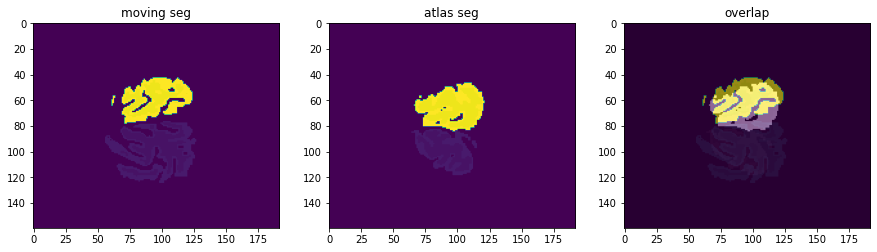

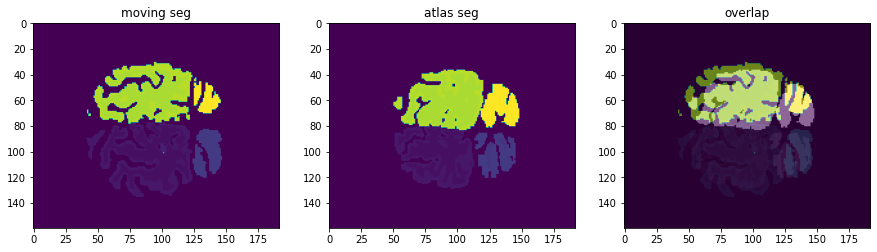

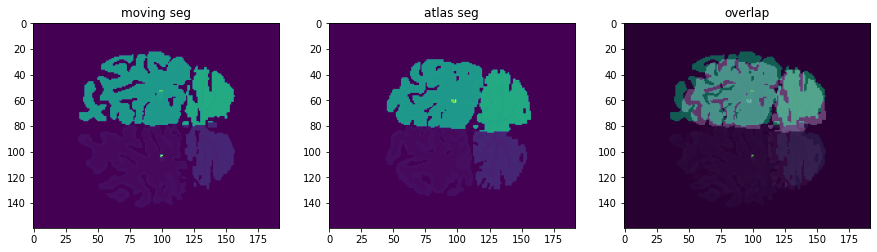

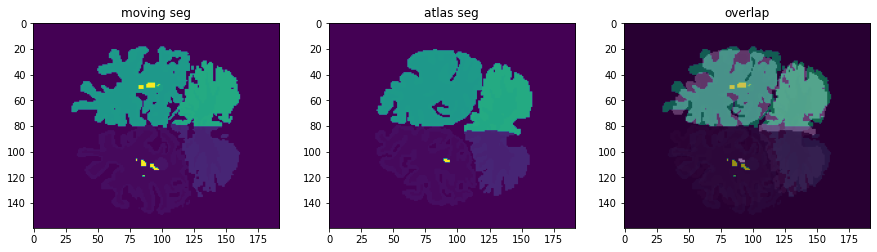

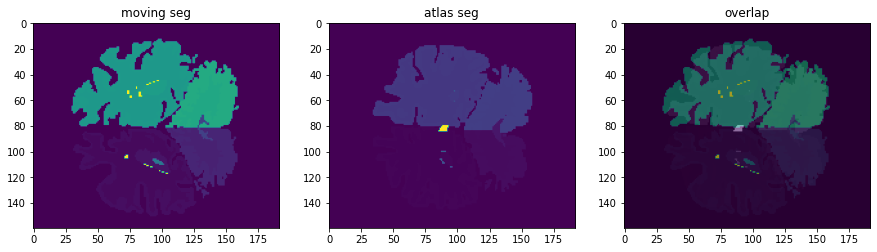

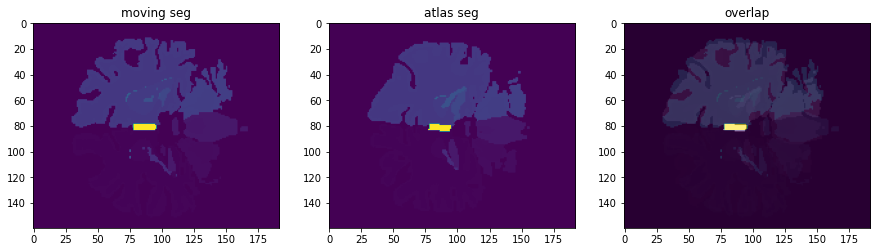

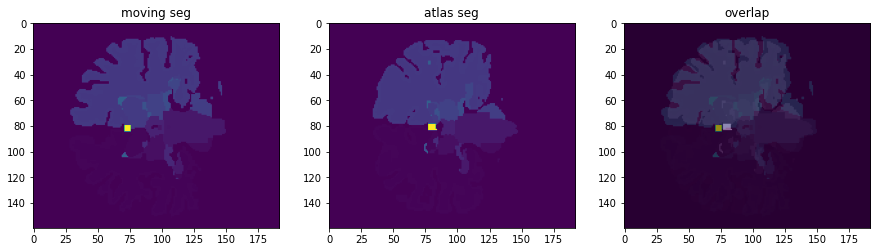

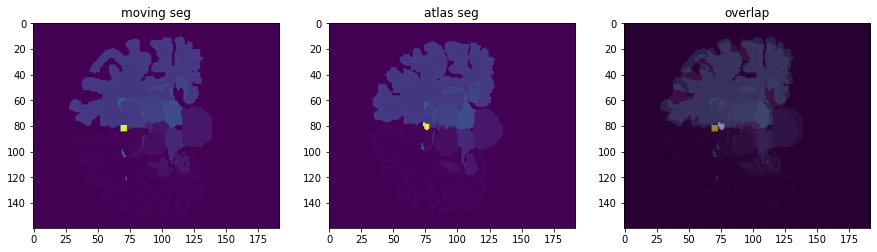

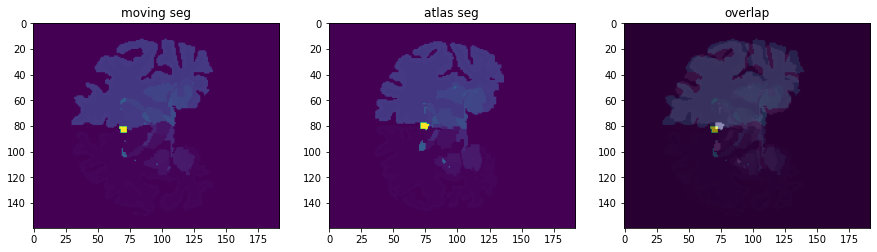

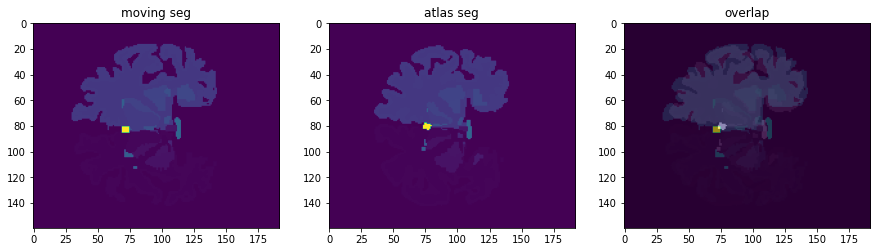

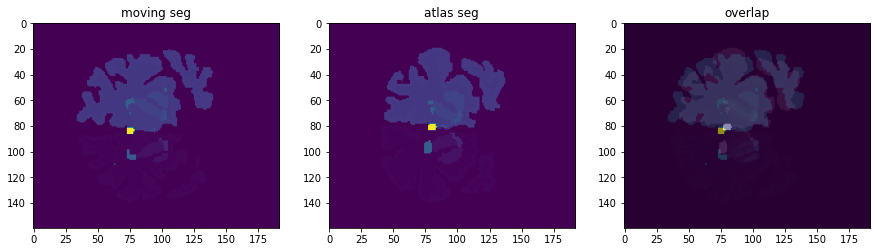

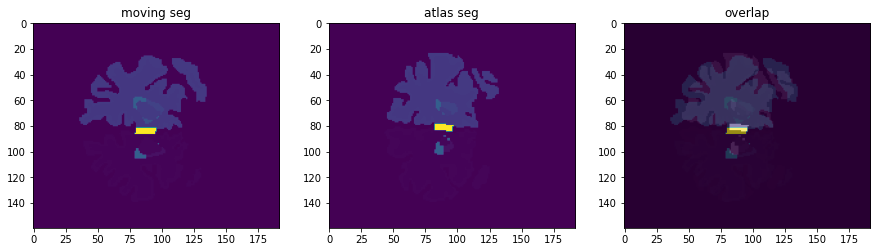

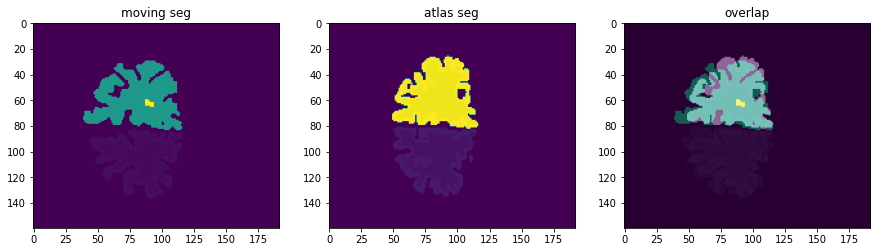

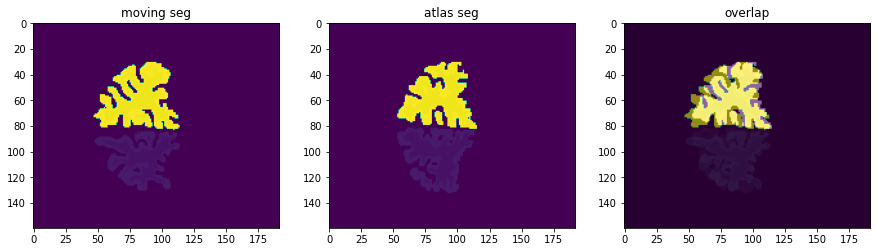

In [ ]:


rows = 1
index=0
for x in range(14):
    plt.figure(figsize=(15,15))
    index=0
    im_mov   = cv2.imread(moving_label_paths[x],cv2.IMREAD_UNCHANGED)
    im_atlas = cv2.imread(atlas_label_paths[x],cv2.IMREAD_UNCHANGED)
    plt.subplot(rows,3,index+1)
    plt.imshow(im_mov)
    plt.title("moving seg")
    index=index+1
    plt.subplot(rows,3,index+1)
    plt.imshow(im_atlas)
    plt.title("atlas seg")
    index=index+1
    plt.subplot(rows,3,index+1)
    plt.imshow(im_mov)
    plt.imshow(im_atlas,alpha=0.4,cmap='gray')
    plt.title("overlap")
    index=index+1


# we can see the images are not affinely registered
## Align affinely

In [ ]:
# create folder for saving affine registered images
affine_path='/content/gdrive/MyDrive/Nature_code/REG_model/affined2D/'
# os.mkdir(affine_path) #uncomment if folder is not already created before

### we are using ANTS for affine transormation but anyother framwork can be used that can do the same job

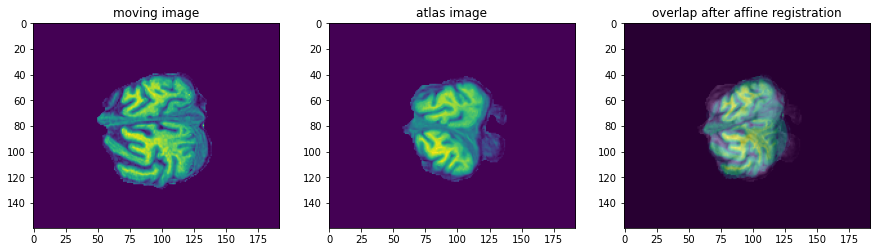

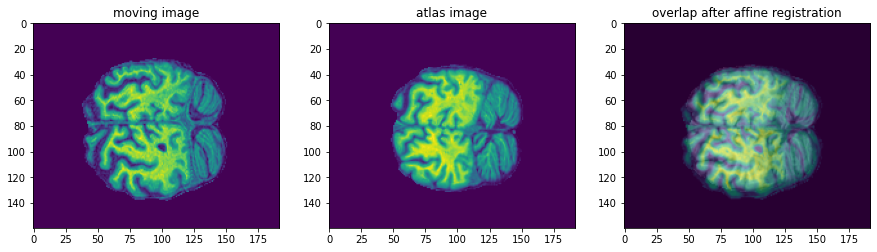

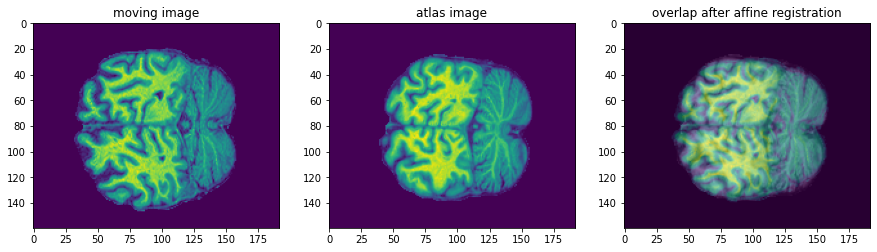

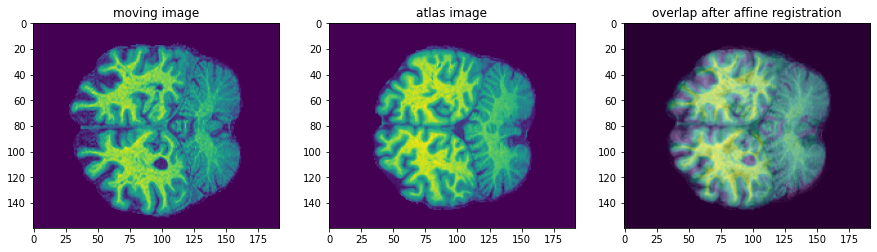

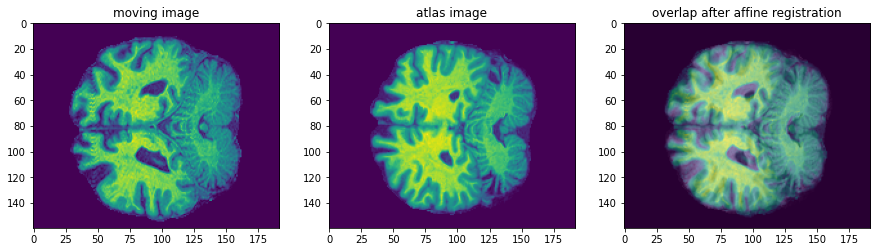

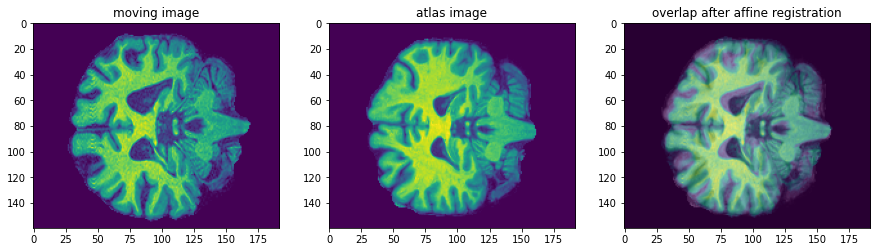

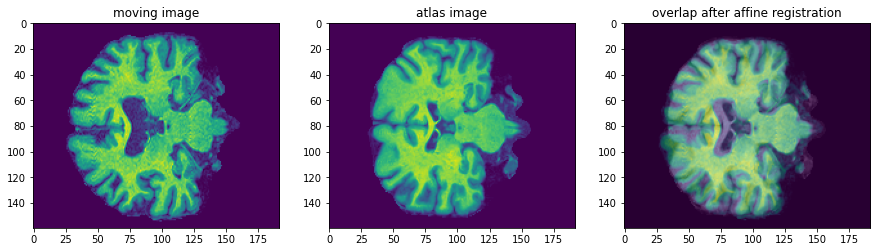

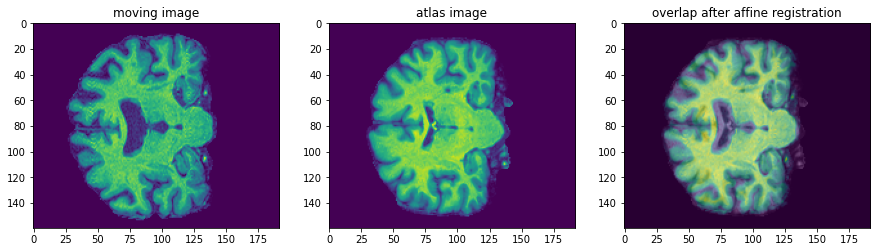

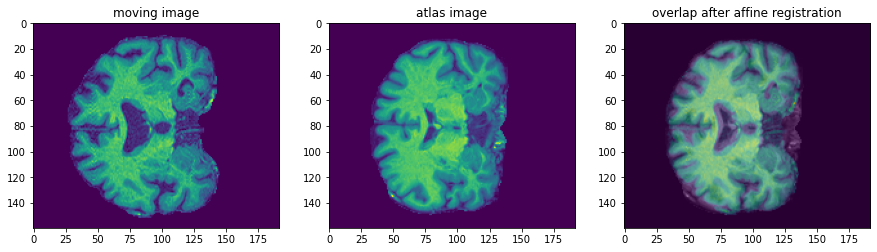

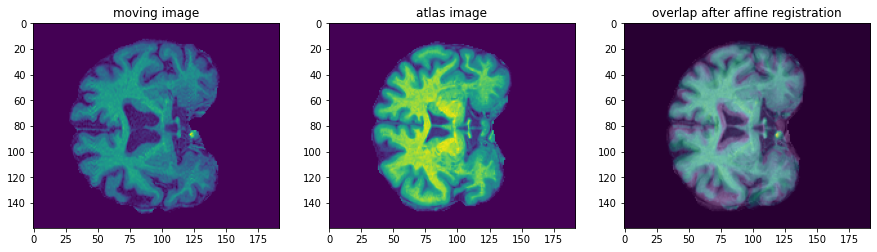

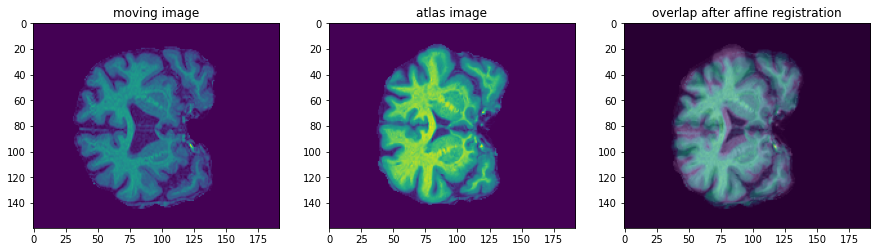

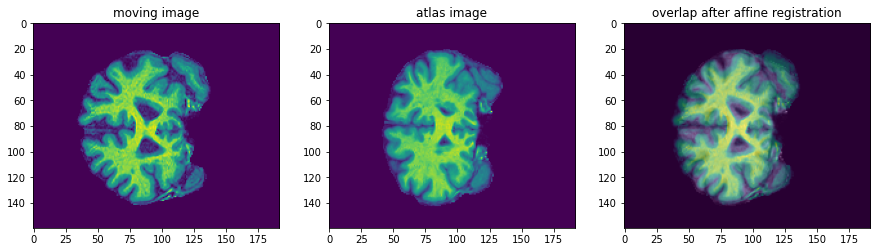

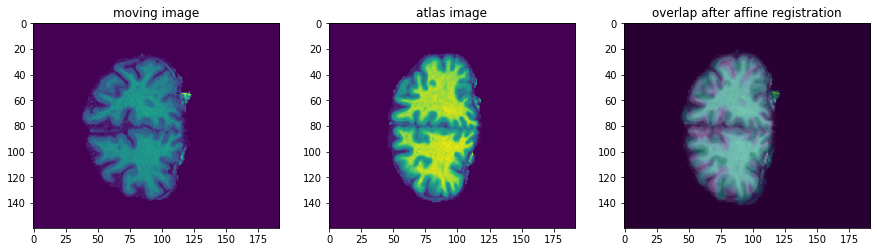

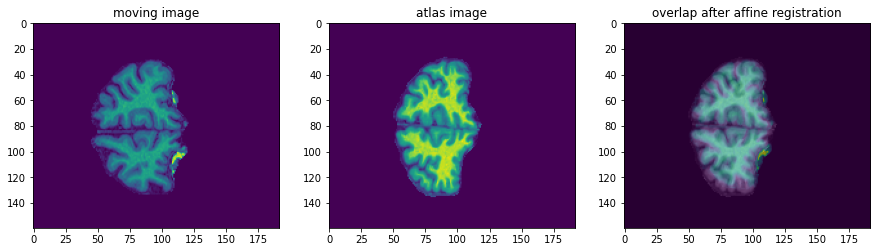

In [ ]:
rows = 1
index=0
for x in range(14):
  plt.figure(figsize=(15,15))
  index=0
  im_mov   = cv2.imread(moving_image_paths[x],cv2.IMREAD_UNCHANGED)
  im_mov= ants.from_numpy( im_mov)
  im_atlas = cv2.imread(atlas_image_paths[x],cv2.IMREAD_UNCHANGED)
  im_atlas= ants.from_numpy( im_atlas)
  
  seg_mov   = cv2.imread(moving_label_paths[x],cv2.IMREAD_UNCHANGED)
  seg_mov= ants.from_numpy( seg_mov)
  seg_atlas = cv2.imread(atlas_label_paths[x],cv2.IMREAD_UNCHANGED)
  seg_atlas= ants.from_numpy( seg_atlas)

  
  mytx = ants.registration(fixed=im_atlas , moving=im_mov, type_of_transform='Affine' , reg_iterations= (1000,1000,1000,1000))
  # print(mytx.keys())
  # getting warped moving image
  warped_moving_norm = mytx['warpedmovout']
  #applying transformation matrix to moving segmentation
  warped_moving_seg = ants.apply_transforms(fixed=im_atlas, moving=seg_mov, transformlist=mytx['fwdtransforms'],interpolator='nearestNeighbor')

  #writing affine registered images
  cv2.imwrite(affine_path+"/affined_moving/"+str(x)+".png", warped_moving_norm.numpy()) 
  cv2.imwrite(affine_path+"/affined_moving_seg/"+str(x)+".png", warped_moving_seg.numpy()) 
  # print( np.unique(seg_mov.numpy()))
  # print( np.unique(warped_moving_seg.numpy()))

  plt.subplot(rows,3,index+1)
  plt.imshow(im_mov.numpy())
  plt.title("moving image")
  index=index+1
  plt.subplot(rows,3,index+1)
  plt.imshow(im_atlas.numpy())
  plt.title("atlas image")
  index=index+1
  plt.subplot(rows,3,index+1)
  plt.imshow(warped_moving_norm.numpy())
  plt.imshow(im_atlas.numpy(),alpha=0.4,cmap='gray')
  plt.title("overlap after affine registration")
  index=index+1





Text(0.5, 1.0, 'segmentation after affine alignemnt')

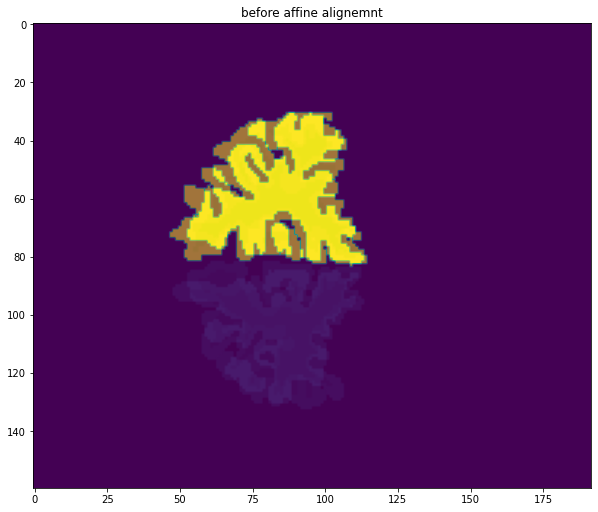

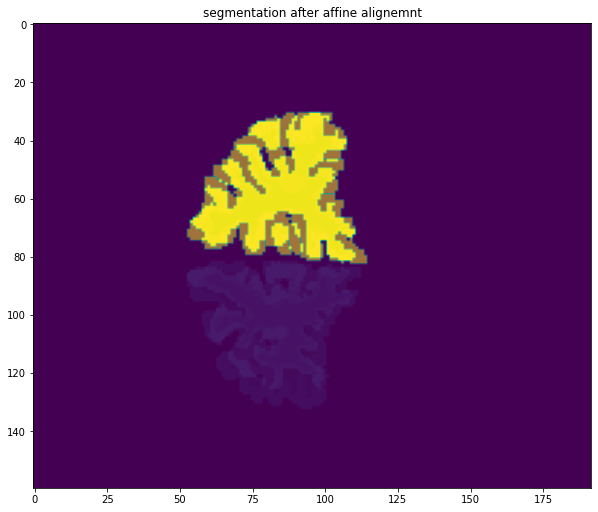

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(seg_mov.numpy())
plt.imshow(seg_atlas.numpy(),alpha=0.5)
plt.title("before affine alignemnt")
plt.figure(figsize=(10, 10))
plt.imshow(warped_moving_seg.numpy())
plt.imshow(seg_atlas.numpy(),alpha=0.5)
plt.title("segmentation after affine alignemnt")

In [ ]:
seg_mov.shape

(160, 192)

In [ ]:
# getting file paths for affined data
affined_mov_dir =affine_path+"/affined_moving/"
affined_mov_seg_dir = affine_path+"/affined_moving_seg/"


affined_mov_paths = glob.glob(affined_mov_dir+"*.png")
affined_mov_seg_paths =glob.glob(affined_mov_seg_dir+"*.png")
affined_mov_paths=natsort.natsorted(affined_mov_paths)
affined_mov_seg_paths=natsort.natsorted(affined_mov_seg_paths)



In [ ]:
image = plt.imread(affined_mov_paths[0])
orig_shape=image.shape
orig_shape

(160, 192)

In [ ]:
affined_mov_paths

['/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/0.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/1.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/2.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/3.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/4.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/5.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/6.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/7.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/8.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/9.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/10.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/11.png',
 '/content/gdr

In [ ]:
#getting original shape of the data
image = plt.imread(affined_mov_paths[0])
orig_shape=image.shape
orig_shape

(160, 192)

# preparing data for training and validation
### description of train_test_split

In [ ]:
atlas_training_paths,  atlas_test_paths, atlas_label_training_paths, atlas_label_test_paths = train_test_split( atlas_image_paths, atlas_label_paths, test_size=0.33, random_state=42)

In [ ]:
atlas_label_training_paths

['/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/8.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/2.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/1.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/13.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/4.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/7.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/10.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/3.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/6.png']

In [ ]:
moving_training_paths, moving_test_paths, moving_label_training_paths, moving_label_test_paths = train_test_split( affined_mov_paths, affined_mov_seg_paths, test_size=0.33, random_state=42)

In [ ]:
moving_label_training_paths

['/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving_seg/8.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving_seg/2.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving_seg/1.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving_seg/13.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving_seg/4.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving_seg/7.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving_seg/10.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving_seg/3.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving_seg/6.png']

# modify loader functions to accomodate different formats

In [ ]:
#laoding function for images
def load(image_file):
    # it can be modified as per image format
    # image = plt.imread((image_file))
    image=cv2.imread(image_file,cv2.IMREAD_UNCHANGED)
   

   
    return image

In [ ]:


def resize(img, shape, mode='constant', order=1,orig_shape=orig_shape):
    """
    Wrapper for scipy.ndimage.zoom suited for MRI images.
    """
    assert len(shape) == 2, "Can not have more than 3 dimensions"
    factors = (
        shape[0]/orig_shape[0],
        shape[1]/orig_shape[1], 
          )
    
    # Resize to the given shape
    return zoom(img, factors, mode=mode,order=order)


def preprocess(img, out_shape=None, order=1):
    """
    Preprocess the image.
    Just an example, you can add more preprocessing steps if you wish to.
    """
    if out_shape is not None:
        img = resize(img, out_shape, mode='nearest', order=order)
    
    # Normalize the image
    # mean = img.mean()
    # std = img.std()
    return (img  / np.max(img))
def preprocess_label(img, out_shape=None, mode='nearest', order=0):
    """
    Separates out the 3 labels from the segmentation provided, namely:
    GD-enhancing tumor (ET — label 4), the peritumoral edema (ED — label 2))
    and the necrotic and non-enhancing tumor core (NCR/NET — label 1)
    
    """
    
    if out_shape is not None:
        img = resize(img, out_shape, mode='constant', order=order)
    
    return (img)


# registraion model settings

In [ ]:
# shape for input image to the model
vol_shape = (160, 192)
print(vol_shape)

(160, 192)


# inference

In [ ]:
def dice(vol1, vol2, labels=None, nargout=1):
    '''
    Dice Code is from voxelmorph
    Dice [1] volume overlap metric

    The default is to *not* return a measure for the background layer (label = 0)

    [1] Dice, Lee R. "Measures of the amount of ecologic association between species."
    Ecology 26.3 (1945): 297-302.

    Parameters
    ----------
    vol1 : nd array. The first volume (e.g. predicted volume)
    vol2 : nd array. The second volume (e.g. "true" volume)
    labels : optional vector of labels on which to compute Dice.
        If this is not provided, Dice is computed on all non-background (non-0) labels
    nargout : optional control of output arguments. if 1, output Dice measure(s).
        if 2, output tuple of (Dice, labels)

    Output
    ------
    if nargout == 1 : dice : vector of dice measures for each labels
    if nargout == 2 : (dice, labels) : where labels is a vector of the labels on which
        dice was computed
    '''
    if labels is None:
        labels = np.unique(np.concatenate((vol1, vol2)))
        labels = np.delete(labels, np.where(labels == 0))  # remove background

    dicem = np.zeros(len(labels))
    for idx, lab in enumerate(labels):
        vol1l = vol1 == lab
        vol2l = vol2 == lab
        top = 2 * np.sum(np.logical_and(vol1l, vol2l))
        bottom = np.sum(vol1l) + np.sum(vol2l)
        bottom = np.maximum(bottom, np.finfo(float).eps)  # add epsilon.
        dicem[idx] = top / bottom

    if nargout == 1:
        return dicem
    else:
        return (dicem, labels)


[0, 2, 3, 41, 42]
[0, 2, 3, 8, 41, 42, 47]
[0, 2, 3, 7, 8, 41, 42, 77, 46, 47, 63]
[0, 2, 3, 7, 8, 41, 42, 77, 46, 47]
[0, 2, 3, 4, 7, 8, 41, 42, 43, 77, 46, 15, 47]
[0, 2, 3, 4, 7, 8, 15, 16, 17, 31, 41, 42, 43, 46, 47, 53, 63, 77, 251]
[0, 2, 3, 4, 7, 10, 11, 16, 17, 24, 28, 31, 41, 42, 43, 46, 47, 49, 50, 53, 60, 63, 77, 252]
[0, 2, 3, 4, 10, 11, 12, 14, 16, 17, 24, 28, 31, 41, 42, 43, 44, 49, 50, 51, 53, 60, 63, 77, 252]
[0, 2, 3, 4, 5, 10, 11, 12, 13, 14, 17, 18, 24, 28, 31, 41, 42, 43, 44, 49, 50, 51, 52, 53, 54, 60, 63, 77, 253]
[0, 2, 3, 4, 11, 12, 13, 14, 26, 31, 41, 42, 43, 50, 51, 52, 54, 60, 63, 77, 85, 254]
[0, 2, 3, 4, 58, 41, 42, 11, 12, 43, 77, 50, 51, 26, 63, 254, 31]
[0, 2, 3, 4, 255, 41, 42, 11, 43, 77, 50, 63]
[0, 2, 3, 41, 42]
[0, 2, 3, 41, 42]


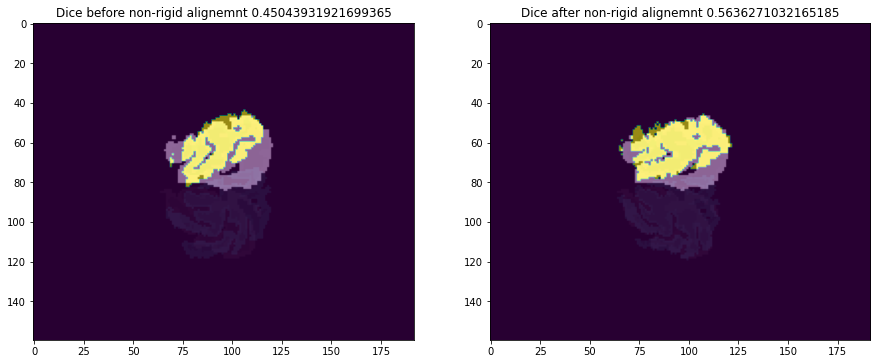

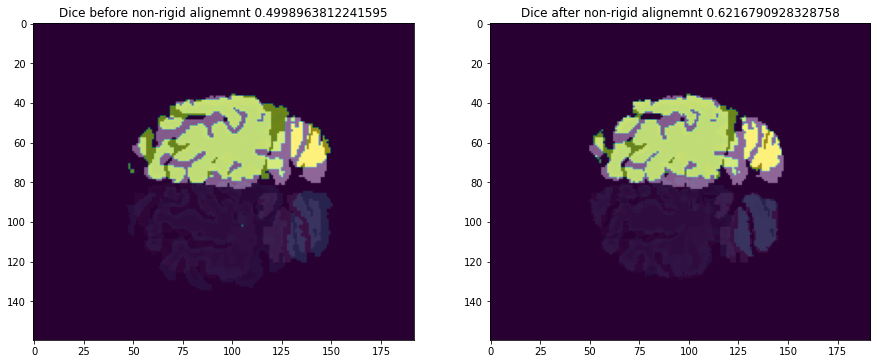

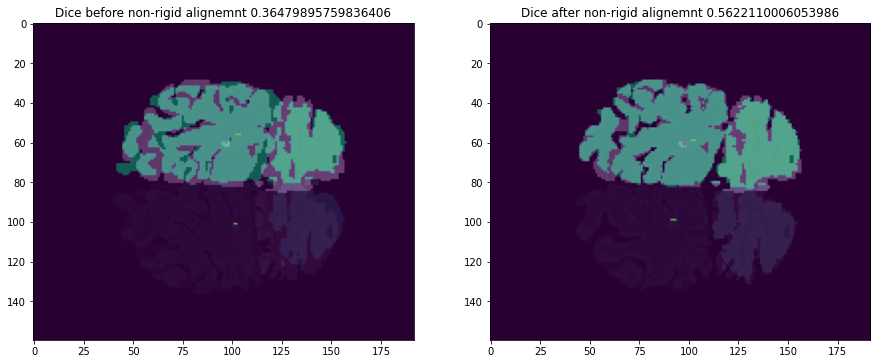

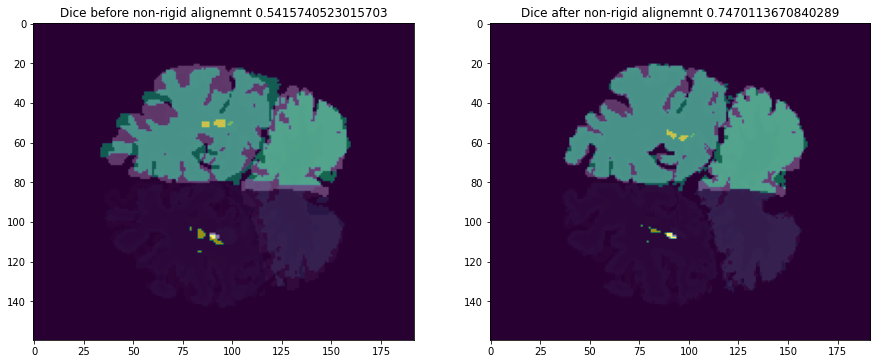

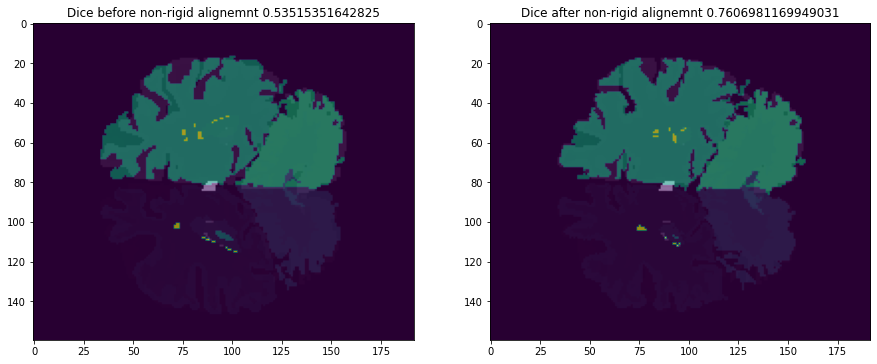

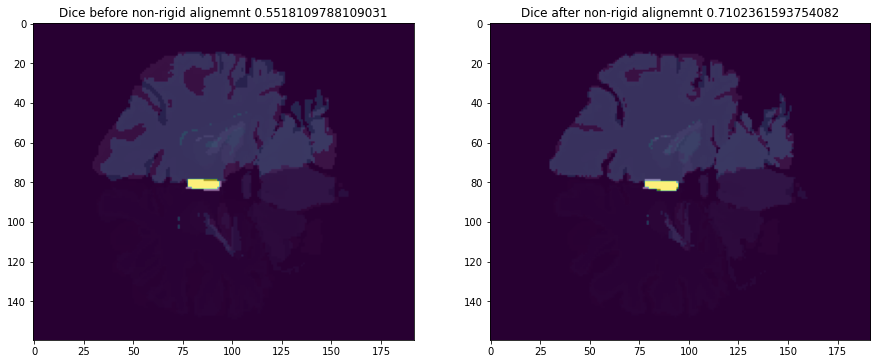

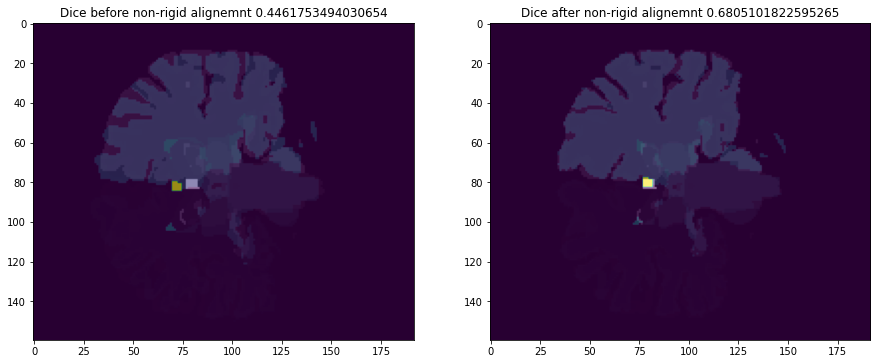

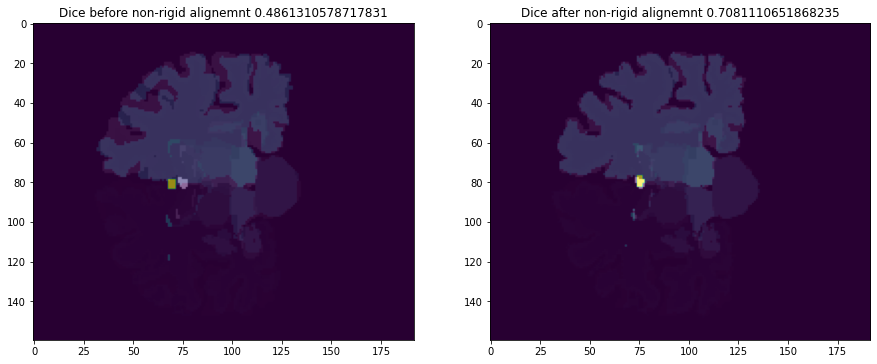

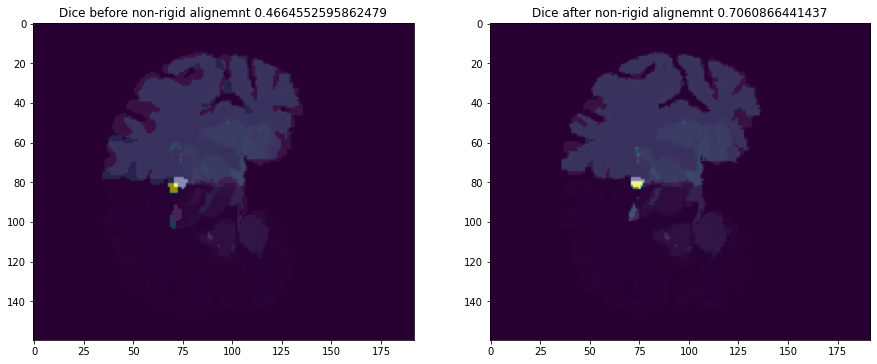

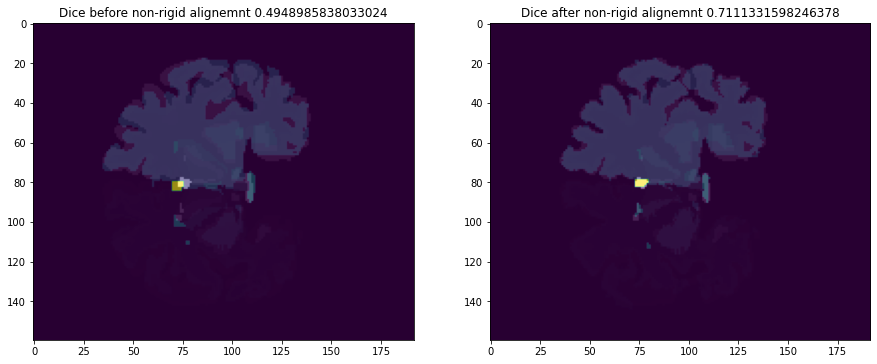

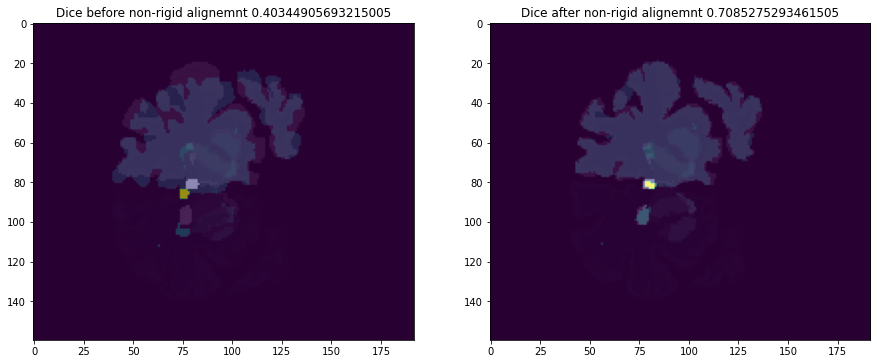

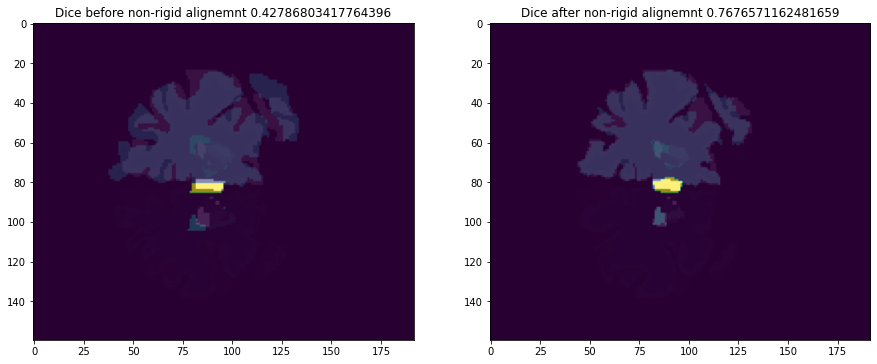

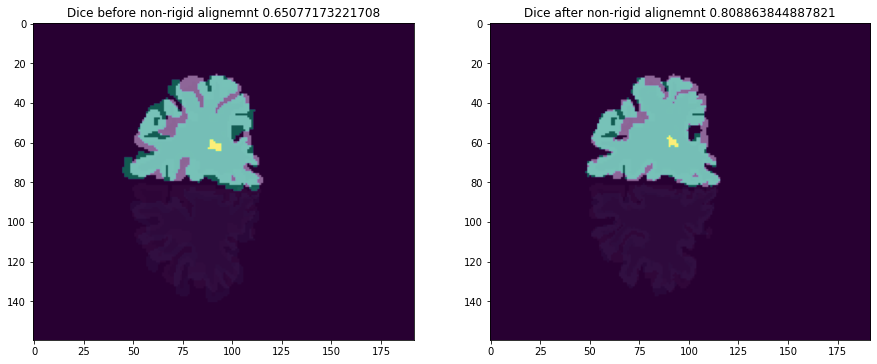

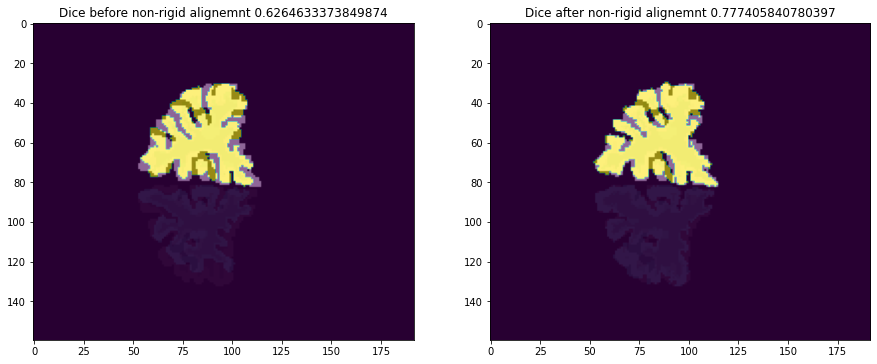

In [ ]:
rows = 1
index=0
for i in range(len(atlas_image_paths)):
  index=0
  atlas_image=load(atlas_image_paths[i])
  atlas_seg=load(atlas_label_paths[i])

  moving_image=load(affined_mov_paths[i])
  moving_seg=load(affined_mov_seg_paths[i])


  atlas_image=preprocess(atlas_image,vol_shape)
  moving_image=preprocess(moving_image,vol_shape)

  atlas_seg=preprocess_label(atlas_seg,vol_shape)
  moving_seg=preprocess_label(moving_seg,vol_shape)


  
  moving_image= ants.from_numpy( moving_image)
  atlas_image= ants.from_numpy( atlas_image)
  
  
  moving_seg= ants.from_numpy( moving_seg)
  atlas_seg= ants.from_numpy( atlas_seg)

  
  mytx_non_rigid = ants.registration(fixed=atlas_image , moving=moving_image, type_of_transform='SyN', grad_step=0.25 , reg_iterations=(50,50,50, ),flow_sigma=9,total_sigma=0.2)
  
  # print(mytx.keys())  # getting warped moving image
  warp = mytx_non_rigid['warpedmovout']
  #applying transformation matrix to moving segmentation
  warp_seg = ants.apply_transforms(fixed=atlas_image, moving=moving_seg, transformlist=mytx_non_rigid['fwdtransforms'],interpolator='nearestNeighbor')

   
  #finding common lables in both segmentation images
  atlas_lab=np.unique(atlas_seg.numpy())
  moving_lab=np.unique(moving_seg.numpy())
  labels=list(set(atlas_lab).intersection(moving_lab))
  print((labels))





  dice_with_affine_alignment, _ = dice(moving_seg.numpy(), atlas_seg.numpy(), labels=labels, nargout=2)


  dice_with_non_rigid_alignment, _ = dice(warp_seg.numpy(), atlas_seg.numpy(), labels=labels, nargout=2)


  plt.figure(figsize=(15,15))

  plt.subplot(rows,2,index+1)
  plt.imshow(moving_seg.numpy())
  plt.imshow(atlas_seg.numpy(),alpha=0.4,cmap='gray')
  plt.title("Dice before non-rigid alignemnt "+str((np.mean(dice_with_affine_alignment)) ))
  index=index+1
  plt.subplot(rows,2,index+1)
  plt.imshow(warp_seg.numpy())
  plt.imshow(atlas_seg.numpy(),alpha=0.4,cmap='gray')
  plt.title("Dice after non-rigid alignemnt "+str((np.mean(dice_with_non_rigid_alignment))))
  index=index+1


              
